<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
function binomial_p(n, k, p)
    return (prod(1:n)/(prod(1:k).*prod(1:n-k))).*p.^k .* (1-p).^(n-k)
end

binomial_p (generic function with 1 method)

In [2]:
binomial_p(10, 2, 0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [3]:
w = binomial_p(10, 5, 0.4)
println("The chance of winning the bet: $(w*100)%")

The chance of winning the bet: 20.06581248%


The chance of losing the bet:

In [4]:
h = [0 1 2 3 4 6 7 8 9 10]
l = []
x = 1
while x <= length(h)
    value = binomial_p(10, h[x], 0.4)
    x += 1
    push!(l, value)
end
l = sum(l)
println("The chance of losing the bet: $(l*100)%")

The chance of losing the bet: 79.93418752%


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [5]:
expected = (w*30)+(l*-10)

println("If I play this game, I will lose money as my expected outcome is $(expected)!")

If I play this game, I will lose money as my expected outcome is -1.973675007999999!


### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [6]:
w2 = binomial_p(10,4,0.4)
println("The chance of winning the bet: $(w2*100)%")

The chance of winning the bet: 25.0822656%


In [7]:
h2 = [0 1 2 3 5 6 7 8 9 10]
l2 = []
x2 = 1
while x2 <= length(h2)
    value2 = binomial_p(10, h2[x2], 0.4)
    x2 += 1
    push!(l2, value2)
end
l2 = sum(l2)
println("The chance of losing the bet: $(l2*100)%")

The chance of losing the bet: 74.9177344%


In [8]:
expected2 = (w2*30)+(l2*-10)

println("If I play this game, I will win money as my expected outcome is $(expected2)!")

If I play this game, I will win money as my expected outcome is 0.03290623999999909!


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [9]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\choan\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Manifest.toml`


In [10]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [11]:
using Distributions
using Plots
using Polynomials: Polynomial, fit, coeffs
using Random
using Statistics

In [12]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [13]:
line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 0.8802845867737132
 2.4420938172335895

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [14]:
function chisqr(b, m, x, y_observed, sigma)
    return sum((y_observed .- ((m .* x) .+ b)).^2 ./ sigma.^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [15]:
chi2_list = []
for i in 1:10000
    sigma = 3
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise
    line_fit = fit(x,y_observed,1)
    fit_coeff = coeffs(line_fit)
    push!(chi2_list, chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma))
end
chi2_list

10000-element Vector{Any}:
  7.918420909761769
 11.358265987756505
  6.253916534843926
  5.319473111255244
  8.737603649937013
  9.76881202502819
 12.685246629892013
 16.148813812218755
  9.650614398748427
  5.30356454534909
  8.436208238842843
  6.943750016971086
  8.273567193099407
  ⋮
 18.782434269886885
 15.077313918534566
  7.5391162340833215
 14.718609399643407
  7.0217564010632625
  8.278585201363946
  4.657694967186446
 15.5156743789943
 24.007016382192848
  5.3111106096384555
 12.177866871358475
  8.757668023181745

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [16]:
mean(chi2_list)

9.006914641220773

The mean value does make sense since the degrees of freedom could be found by finding the difference between the number of data points and the number of coefficients in the polynomial. In this case, we have 11 data points and 2 coefficients, so we should be getting 9 degrees of freedom.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [17]:
x_dist = 0:0.1:30
chi2 = di.Chisq(9)

Chisq{Float64}(ν=9.0)

In [18]:
di.pdf.(chi2, x_dist)

301-element Vector{Float64}:
 0.0
 1.1428942366001283e-6
 1.2299750542593248e-5
 4.836163622612302e-5
 0.00012591336776345084
 0.00026154243420697774
 0.00047093590003979466
 0.0007683530828685478
 0.001166320551909492
 0.001675471454116871
 0.002304483090658508
 0.003060082954575015
 0.003947102811682228
 ⋮
 0.0002614014262875883
 0.00025167714099304245
 0.00024230452048804813
 0.00023327130074080952
 0.0002245656249905829
 0.00021617603114895342
 0.00020809143954820985
 0.00020030114102929654
 0.0001927947853618627
 0.00018556236998899304
 0.0001785942290892956
 0.00017188102294906867

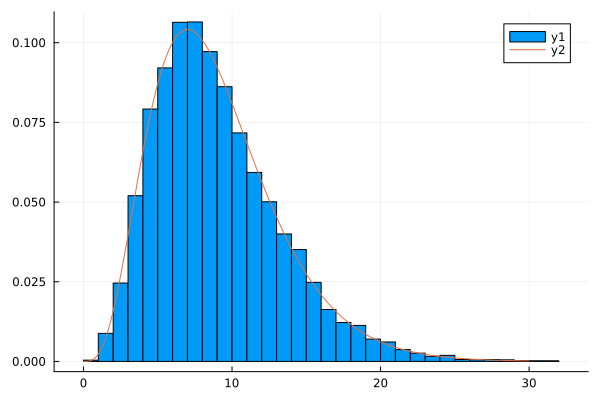

In [19]:
histogram(chi2_list, bin=50, normalize=true)
plot!(x_dist, di.pdf.(di.Chisq(9),x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [20]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

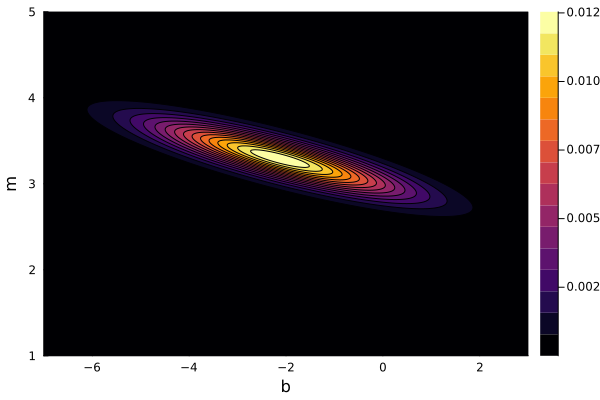

In [21]:
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range, p_chi2poly, xlabel = "b", ylabel = "m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

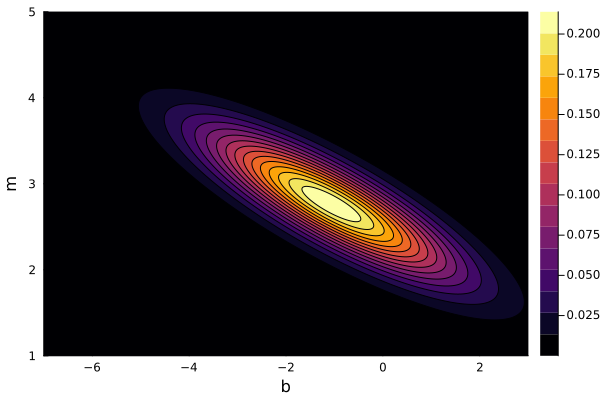

In [22]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Compared to the contour plot in 2.6, this plot has a larger m range making it look vertically wider, and it also looks more tilted. As x is redefined from 0 to 10 with a whole step interval to 0 to 5 with a half step interval, there is still the same number of data points, but the range has become smaller. This means that m becomes more sensitive to noise as the x range gets smaller leading to a contour plot with larger m range and more tilt. 

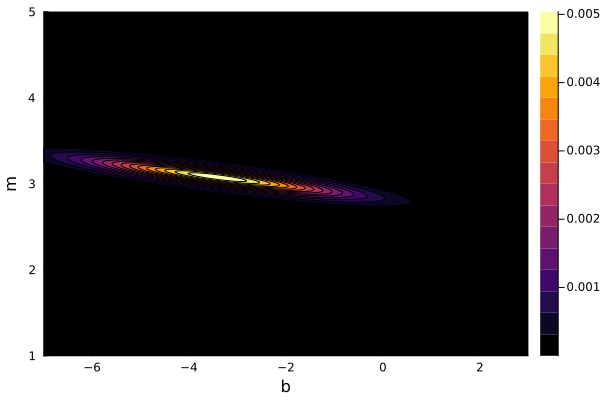

In [23]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Compared to the contour plot in 2.6, this plot has a smaller m range making it look vertically thinner and less tilted. As x is redefined from 0 to 10 with a whole step interval to 0 to 20 with a double step interval, there is still the same number of data points, but the range has become larger. This means that m becomes less sensitive to noise as the x range gets larger leading to a contour plot with smaller m range and less tilt. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

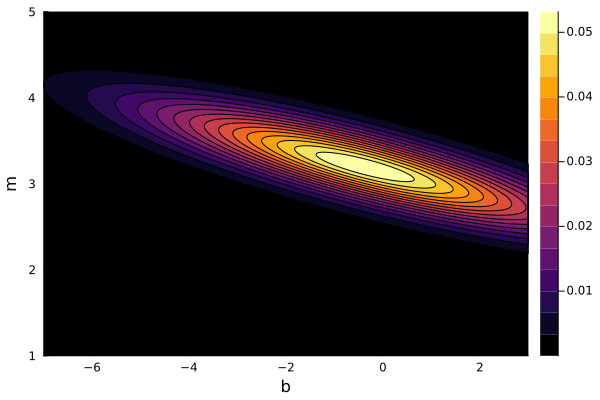

In [24]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Compared to the contour plot in 2.6, this plot has a larger b range making it look horizontally wider and generally larger. As sigma is redefined from 3 to 5, b becomes more sensitive to noise leading to an overall larger contour plot with a larger b range. 

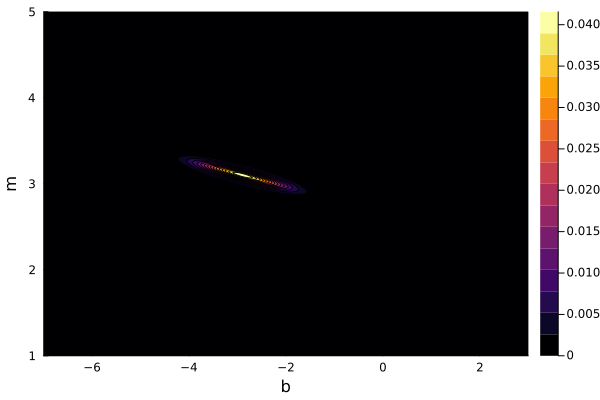

In [25]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2)
m_range = 1:0.01:5
b_range = -7:0.01:3
contourf(b_range,m_range, p_chi2poly, xlabel = "b", ylabel = "m")

Compared to the contour plot in 2.6, this plot has a smaller b range making it look horizontally thinner and generally smaller. As sigma is redefined from 3 to 1, b becomes less sensitive to noise leading to an overall smaller contour plot with a smaller b range. 